Lab | Imbalanced data
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

Instructions: 

Load the dataset and explore the variables.
We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
Build the logistic regression model.

Evaluate the model.

Even a simple model will give us more than 70% accuracy. Why?

Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [30]:
# import libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# import data
data= pd.read_csv('files_for_lab/customer_churn.csv')

In [68]:
data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1
...,...,...,...,...
7038,24,0,84.80,0
7039,72,0,103.20,0
7040,11,0,29.60,0
7041,4,1,74.40,1


In [32]:
# select desired columns for the model
data = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]

In [33]:
# create a dataframe
data=pd.DataFrame(data)

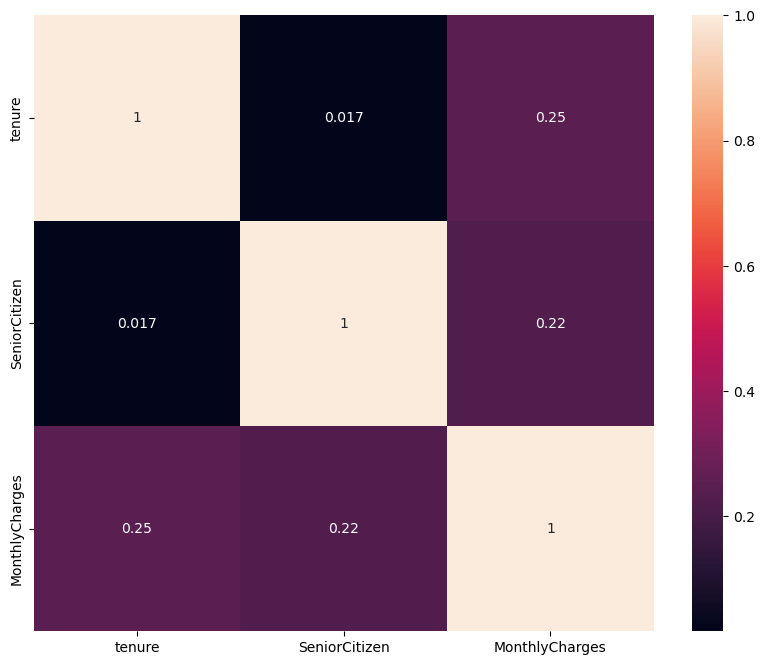

In [34]:
corr_matrix=data.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [35]:
# transform yes and no in churn colum to 0 and 1
def transform(x):
    if x == 'Yes':
        return 1
    else:
        return 0

data['Churn'] = list(map(transform,data['Churn']))
data

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1
...,...,...,...,...
7038,24,0,84.80,0
7039,72,0,103.20,0
7040,11,0,29.60,0
7041,4,1,74.40,1


In [36]:
# X, y , numerical and categorical splits 

y = data['Churn']
X = data.drop('Churn', axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

# Standardisation of independent variables

In [67]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
# scaling numerical data using standard scaler

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics,
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1.612532,-0.439763,0.674154
1,-0.747907,2.273954,-0.614894
2,1.571835,-0.439763,-1.335097
3,0.025340,-0.439763,0.301578
4,0.595101,-0.439763,1.128231


In [51]:
# y_train = y_train.reset_index(drop=True)
# # needed because the transformation also reset the index for X_train_scaled
# # so we need this for y_test as well...
# y_test = y_test.reset_index(drop=True)

In [52]:
y_train.head()

2920    0
2966    0
6099    0
5482    1
2012    1
Name: Churn, dtype: int64

## logistic regression 

In [53]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [54]:
LR.predict_proba(X_train_scaled)

array([[0.96029038, 0.03970962],
       [0.60545231, 0.39454769],
       [0.99336071, 0.00663929],
       ...,
       [0.98781232, 0.01218768],
       [0.26199018, 0.73800982],
       [0.79398402, 0.20601598]])

In [55]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

<AxesSubplot:>

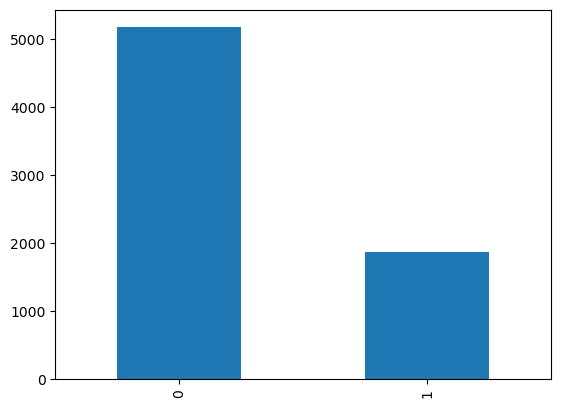

In [56]:
count_classes = data['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [57]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7821149751596878

Even a simple model will give us more than 70% accuracy. Why?

As indicated by the bar chart, there is a noticeable imbalance between the counts of true and false churn cases. This imbalance has the potential to introduce bias into our model's results. The reason behind this is that with more data available for training the model to predict true churn cases, our model will become more proficient at predicting them, but this proficiency may come at the cost of underestimating false churn cases. Consequently, it is feasible to achieve a 70% accuracy, but it is equally possible to end up with an inefficient model.

In [58]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

# print("precision: ",precision_score(y_test,pred))
# print("recall: ",recall_score(y_test,pred))
# print("f1: ",f1_score(y_test,pred))

In [59]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6101083032490975
recall:  0.4592391304347826
f1:  0.524031007751938


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[933, 108],
       [199, 169]], dtype=int64)

## SMOTE

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [64]:
X_train_SMOTE.shape

(8266, 3)

In [65]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4744525547445255
recall:  0.7065217391304348
f1:  0.5676855895196506


In [66]:
confusion_matrix(y_test,pred)

array([[753, 288],
       [108, 260]], dtype=int64)

## Analysis and Evaluation of results

Results:

Before SMOTE:

Precision: 0.6101
Recall: 0.4592
F1-Score: 0.5240

After SMOTE:

Precision: 0.4745
Recall: 0.7065
F1-Score: 0.5677

Discussion:

Precision: After applying SMOTE, the precision decreased from 0.6101 to 0.4745. This means that around 47.45% of predicted churn cases are correct after applying SMOTE. While precision decreased, it is still a valuable metric for minimizing false alarms in a business context.

Recall: A notable improvement was observed in recall, which increased from 0.4592 to 0.7065. This signifies that approximately 70.65% of actual churn cases are correctly identified by the model. This enhancement in capturing true positives is important for reducing the number of missed churn cases.

F1-Score: The F1-Score also saw an improvement, increasing from 0.5240 to 0.5677 after SMOTE. This metric balances precision and recall and, with the enhancement in recall, indicates an overall improvement in model performance.

Therefore evemthough the precision decreased, the tradeoff of applying the SMOTE technique to balance the data means that there will be less false alarms predicted by our model, whic overall increases the efficiency of the model. 